### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- **independent variable**: congruent or incongruent condition.

- **dependent variable**: Time to complete test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- **Null Hypothsis, H0** : Doing congruent tasks take more time than doing so with incongruent ones or take the same amount of time.

- **Alternate Hypothesis, H1** : Incongruent tasks take more time than congruent tasks.

> *H0* : μi ≤ μc 
>
> *H1* : μi > μc 
>
> (μi : population mean of incongruent values, μc: population mean of congruent values)

**statistical test**: dependent t-test (one tailed)

- We need to compare the means of two related groups to determine the statistically significant difference between two means.
- We are assuming distributions are nearly normal and we are comparing 2 dependent samples of data.
- our sample size less than 30 and we don't know the population standard deviations.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import stats
%matplotlib inline

In [49]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [50]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [54]:
medi_con, medi_incon = df.median()
medi_con, medi_incon

(14.3565, 21.017499999999998)

In [4]:
mean_con, mean_incon = df.mean()
mean_con, mean_incon

(14.051125000000004, 22.015916666666669)

In [5]:
std_con, std_incon = df.std()
std_con, std_incon

(3.559357957645195, 4.7970571224691376)

--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

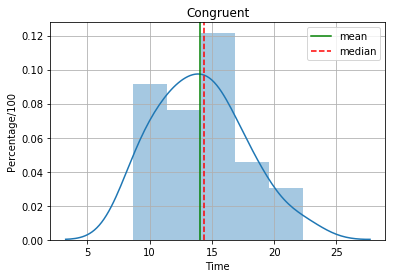

In [36]:
ax = sns.distplot(df['Congruent'], axlabel='Time')
ax.axvline(x=mean_con, color='green',label='mean')
ax.axvline(x=medi_con, color='red',label='median', linestyle='dashed')
ax.set_title('Congruent')
ax.set_ylabel('Percentage/100')
ax.legend()
ax.grid();

- **The congruent data** is more or less normally distributed and the median and mean value is 14.3565 and 14.0511 respectively.

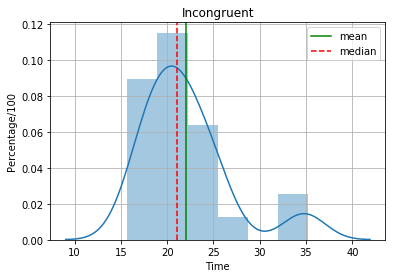

In [35]:
ax = sns.distplot(df['Incongruent'], axlabel='Time')
ax.axvline(x=mean_incon, color='green',label='mean')
ax.axvline(x=medi_incon, color='red',label='median', linestyle='dashed')
ax.set_title('Incongruent')
ax.set_ylabel('Percentage/100')
ax.legend()
ax.grid();

- **The incongruent data** is distributed a bit positively skewed.
- Even though it doesn't look normally distributed, but the difference of median and mean, 21.0175 and 22.0159, is only 0.9984, which is not substantial.

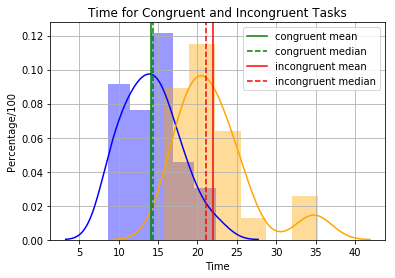

In [67]:
ax = sns.distplot(df['Congruent'], color='blue')
sns.distplot(df['Incongruent'], color='orange')

ax.axvline(x=mean_con, color='green',label='congruent mean')
ax.axvline(x=medi_con, color='green',label='congruent median', linestyle='dashed')
ax.axvline(x=mean_incon, color='red',label='incongruent mean')
ax.axvline(x=medi_incon, color='red',label='incongruent median', linestyle='dashed')

ax.set_title('Time for Congruent and Incongruent Tasks')
ax.set_xlabel('Time')
ax.set_ylabel('Percentage/100')
ax.legend()
ax.grid();

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [38]:
#Sample size
sample_size = df.shape[0]
sample_size

24

In [40]:
#t-critical value for a 95% confidence level and 23 d.f.
t_crit = t.ppf(.95, 23)
t_crit

1.7138715277470473

- For a confidence level of 95% and 23 degrees of freedom, the t-critical value ends up being 1.7139

- Our point estimate for the difference of the means is: 22.0159 - 14.0511 = 7.9648

In [43]:
df['Difference'] = - (df['Congruent'] - df['Incongruent'])
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [45]:
diff_std = df['Difference'].std()
print("standard deviation for congruent:", diff_std.round(4))

standard deviation for congruent: 4.8648


In [58]:
# t-statistics:
t_stat = (mean_incon-mean_con)/(diff_std/math.sqrt(24))
print("t-statistic value:", t_stat.round(4))

t-statistic value: 8.0207


- At α=0.05, t-statistic is greater than the critical value, so we **reject the null hypothesis.**

- The brain has an image association between the shape of the word and the colour. When there is a **mismatch, additional time is necessary** for processing the information and decide on its meaning.